# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [270]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [271]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [272]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ca mau
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | archangelos
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | aral
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | sungailiat
Processing Record 20 of Set 1 | bahir dar
Processing Record 21 of Set 1 | tosno
Processing Record 22 of S

Processing Record 40 of Set 4 | altamira
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | sola
Processing Record 44 of Set 4 | ordynskoye
Processing Record 45 of Set 4 | juneau
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | urcos
Processing Record 48 of Set 4 | smara
Processing Record 49 of Set 4 | fisterra
Processing Record 0 of Set 5 | lucapa
Processing Record 1 of Set 5 | porto novo
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | pionerskiy
Processing Record 4 of Set 5 | haiku-pauwela
Processing Record 5 of Set 5 | mesquite
Processing Record 6 of Set 5 | queenstown
Processing Record 7 of Set 5 | sengiley
Processing Record 8 of Set 5 | port macquarie
Processing Record 9 of Set 5 | mangrol
Processing Record 10 of Set 5 | escarcega
Processing Record 11 of Set 5 | anadyr
Processing Record 12 of Set 5 | youssoufia
Processing Record 13 of Set 5 | sao vicente
Processing 

Processing Record 29 of Set 8 | andradina
Processing Record 30 of Set 8 | tadine
Processing Record 31 of Set 8 | oodweyne
Processing Record 32 of Set 8 | sitangkai
Processing Record 33 of Set 8 | russas
Processing Record 34 of Set 8 | nelson bay
Processing Record 35 of Set 8 | pangkalanbuun
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | slave lake
Processing Record 38 of Set 8 | moose jaw
Processing Record 39 of Set 8 | huai'an
Processing Record 40 of Set 8 | smithers
Processing Record 41 of Set 8 | kristiansund
Processing Record 42 of Set 8 | san julian
Processing Record 43 of Set 8 | kamaishi
Processing Record 44 of Set 8 | riosucio
Processing Record 45 of Set 8 | tralee
Processing Record 46 of Set 8 | krasnyy yar
Processing Record 47 of Set 8 | zell am see
Processing Record 48 of Set 8 | boa vista
Processing Record 49 of Set 8 | togur
Processing Record 0 of Set 9 | serpa
Processing Record 1 of Set 9 | howrah
Processing Record 2 of Set 9 | istmina
Proce

Processing Record 19 of Set 12 | ponta delgada
Processing Record 20 of Set 12 | arkhara
Processing Record 21 of Set 12 | mili
Processing Record 22 of Set 12 | udgir
Processing Record 23 of Set 12 | manaure
Processing Record 24 of Set 12 | tres lagoas
Processing Record 25 of Set 12 | sefwi wiawso
City not found. Skipping...
Processing Record 26 of Set 12 | el calafate
Processing Record 27 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 28 of Set 12 | puerto lempira
Processing Record 29 of Set 12 | longjiang
Processing Record 30 of Set 12 | port augusta
Processing Record 31 of Set 12 | kibondo
Processing Record 32 of Set 12 | encheng
Processing Record 33 of Set 12 | yorosso
Processing Record 34 of Set 12 | jayapura
Processing Record 35 of Set 12 | barakani
-----------------------------
Data Retrieval Complete      
-----------------------------


In [273]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [274]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,axim,4.8699,-2.2405,24.38,95,100,3.11,GH,1700957788
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,69,40,11.62,RU,1700957789
2,punta arenas,-53.1500,-70.9167,9.06,66,20,16.46,CL,1700957790
3,ca mau,9.1769,105.1500,23.96,90,100,0.98,VN,1700957791
4,waitangi,-43.9535,-176.5597,16.01,96,100,6.42,NZ,1700957792


In [275]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [276]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,axim,4.8699,-2.2405,24.38,95,100,3.11,GH,1700957788
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,69,40,11.62,RU,1700957789
2,punta arenas,-53.1500,-70.9167,9.06,66,20,16.46,CL,1700957790
3,ca mau,9.1769,105.1500,23.96,90,100,0.98,VN,1700957791
4,waitangi,-43.9535,-176.5597,16.01,96,100,6.42,NZ,1700957792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

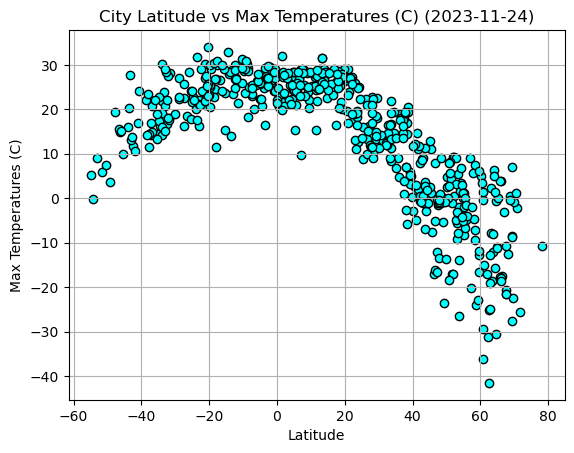

In [277]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.title("City Latitude vs Max Temperatures (C) (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

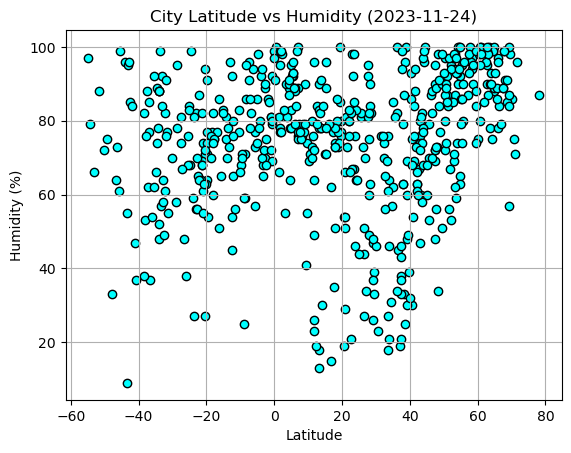

In [278]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

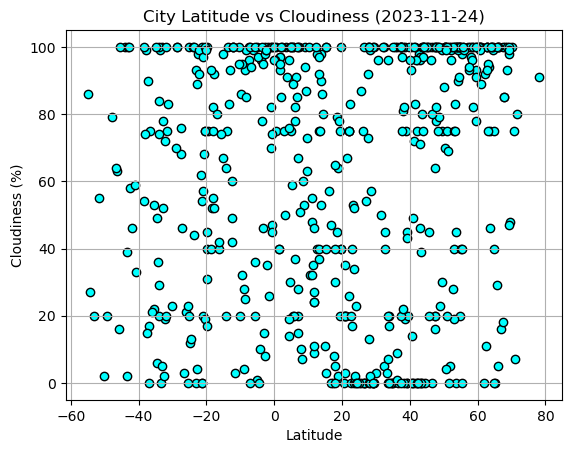

In [279]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

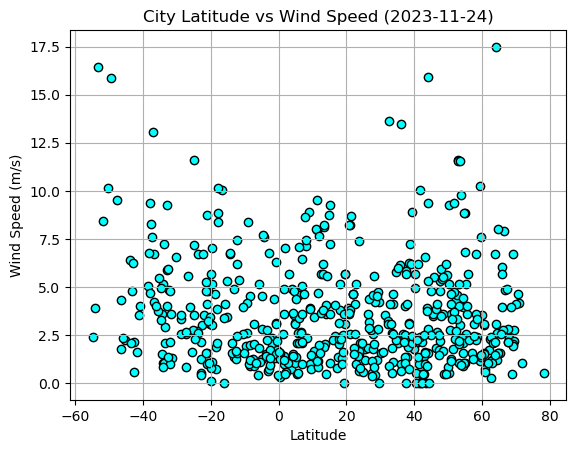

In [280]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-11-24)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [281]:
# Define a function to create Linear Regression plots
def city_weather_linregress(df_name,x_axis,y_axis):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis,y_axis)
    
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq,(max(x_axis)-5,min(y_axis)),fontsize=15,color="red")
    
    regress_values = x_axis*slope + intercept
    plt.plot(x_axis,regress_values,"r-")
    
    plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')
    plt.xlabel("Latitude")
   
    


    print(f"The r value is: {rvalue}")

In [282]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = []
for index, row in city_data_df.iterrows():
    if city_data_df.loc[index,"Lat"] >= 0:
        city = row["City"]
        lat = row["Lat"]
        lng = row["Lng"]
        max_temp = row["Max Temp"]
        humidity = row["Humidity"]
        cloudiness = row["Cloudiness"]
        wind_speed = row["Wind Speed"]
        country = row["Country"]
        date = row["Date"]
        weather_info = {"City":city,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,
                    "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date,
                           }
        northern_hemi.append(weather_info)
        
        
# Display sample data 
            
northern_hemi_df = pd.DataFrame(northern_hemi)
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,axim,4.8699,-2.2405,24.38,95,100,3.11,GH,1700957788
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,69,40,11.62,RU,1700957789
2,ca mau,9.1769,105.1500,23.96,90,100,0.98,VN,1700957791
3,olonkinbyen,70.9221,-8.7187,-2.19,71,7,4.17,SJ,1700957794
4,archangelos,36.2149,28.1149,18.99,82,9,13.50,GR,1700957796


In [283]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = []
for index, row in city_data_df.iterrows():
    if city_data_df.loc[index,"Lat"] < 0:
        city = row["City"]
        lat = row["Lat"]
        lng = row["Lng"]
        max_temp = row["Max Temp"]
        humidity = row["Humidity"]
        cloudiness = row["Cloudiness"]
        wind_speed = row["Wind Speed"]
        country = row["Country"]
        date = row["Date"]
        weather_info = {"City":city,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,
                    "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date,
                           }
        southern_hemi.append(weather_info)

# Display sample data
southern_hemi_df = pd.DataFrame(southern_hemi)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,9.06,66,20,16.46,CL,1700957790
1,waitangi,-43.9535,-176.5597,16.01,96,100,6.42,NZ,1700957792
2,port mathurin,-19.6833,63.4167,24.52,71,31,7.01,MU,1700957220
3,puerto ayora,-0.7393,-90.3518,24.75,92,47,3.13,EC,1700957795
4,adamstown,-25.0660,-130.1015,21.63,84,100,11.58,PN,1700957796


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8608308175683321


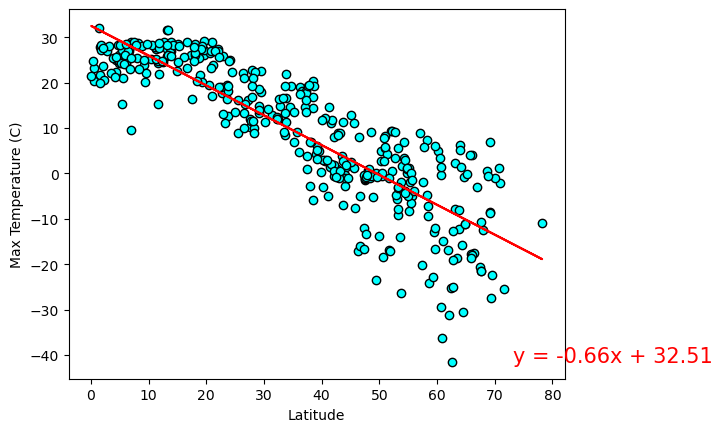

In [284]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
city_weather_linregress(northern_hemi_df,x,y)
plt.ylabel("Max Temperature (C)")
plt.show()

The r value is: 0.6603381148156484


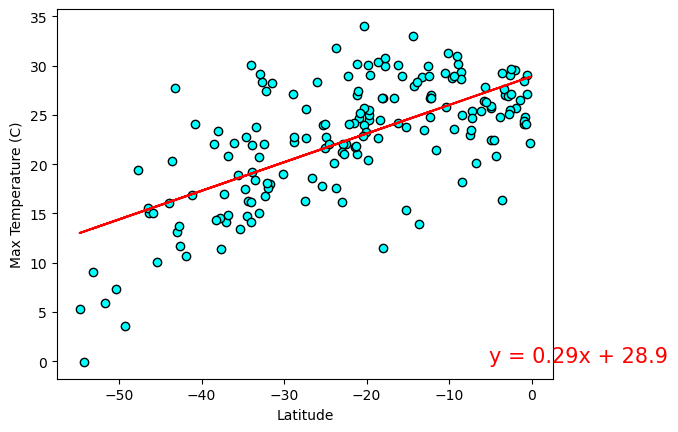

In [285]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
city_weather_linregress(southern_hemi_df,x,y)
plt.ylabel("Max Temperature (C)")
plt.show()

These linear regressions are considering the latitude and maximum temperature of cities found in the northern and southern hemispheres. They both seem to predict that the further away a city is from the equator, the max temp of that city will be lower. In the northern hemisphere, there seems to be a fairly strong negative correlation between maximum temperature and the latitude of cities. Meanwhile, in the southern hemisphere, there is a moderate positive correlation between the maximum temperature and latitude of cities.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.21723359308424042


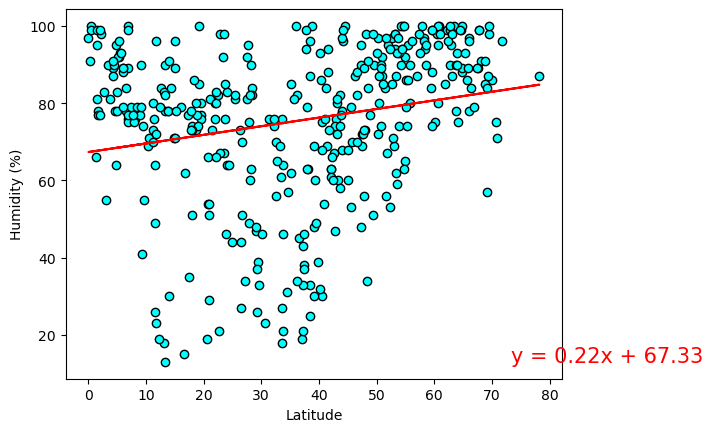

In [286]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
city_weather_linregress(northern_hemi_df,x,y)
plt.ylabel("Humidity (%)")
plt.show()

The r value is: 0.14996108302891675


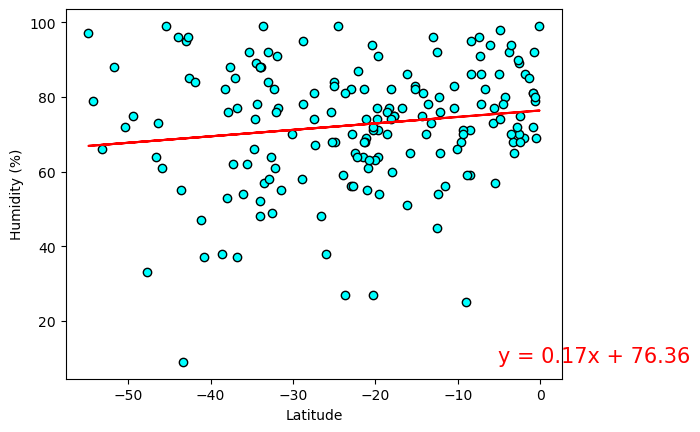

In [287]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
city_weather_linregress(southern_hemi_df,x,y)
plt.ylabel("Humidity (%)")
plt.show()

These regression plots are considering latitude and percentage of humidity of cities within each hemisphere. In both hemispheres, there seems to be a weak or almost negligible correlation between these two factors. Generally, these linear regressions are predicting that the further north a city is located from the equator, it is likely to increase in humidity. In contrast, the further south a city is found from the equator, it will be more likely to have less humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.19227803388836978


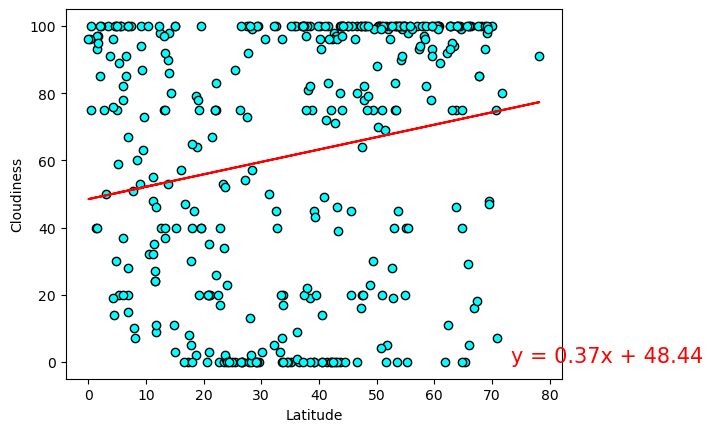

In [288]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
city_weather_linregress(northern_hemi_df,x,y)
plt.ylabel("Cloudiness")
plt.show()

The r value is: 0.17223747467116218


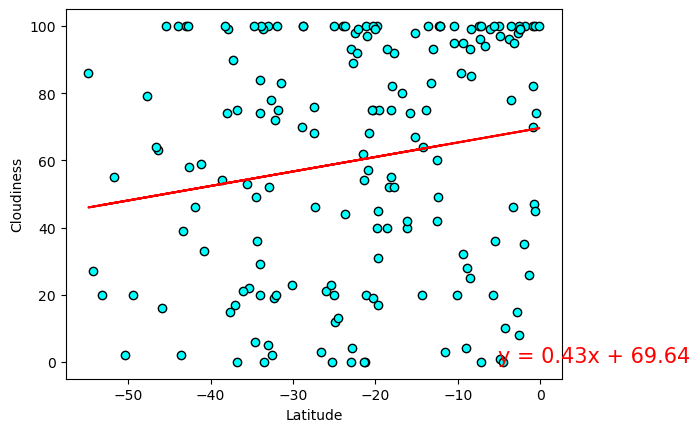

In [289]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
city_weather_linregress(southern_hemi_df,x,y)
plt.ylabel("Cloudiness")
plt.show()

These sets of plots are comparing the latitudes and cloudiness of cities. Once again there seems to be a very weak or almost negligible correlation between these two factors, based on the r values. The linear regression model is predicting that cities in the lowest parts of the southern hemisphere will likely not be very cloudy. However, as we begin to move up towards the equator and even start pushing into the northern hemisphere, the cloudiness found in cities will increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.01733250681517786


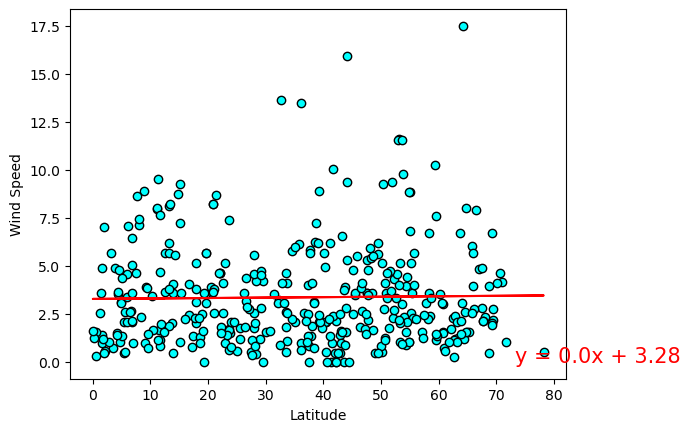

In [290]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
city_weather_linregress(northern_hemi_df,x,y)
plt.ylabel("Wind Speed")
plt.show()

The r value is: -0.3321705469959622


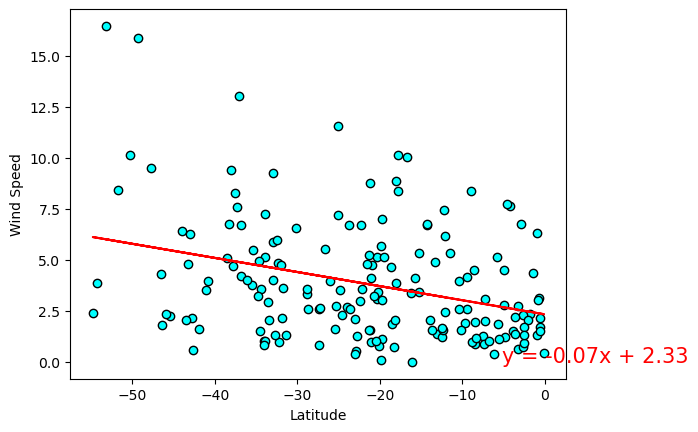

In [291]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
city_weather_linregress(southern_hemi_df,x,y)
plt.ylabel("Wind Speed")
plt.show()

Finally, through plotting wind speed and the latitude of the cities found in our data set, we see that there is virtually no correlation found in the northern hemisphere between these factors. The southern hemisphere shows a very weak negative correlation between latitude and wind speed. The linear regressions we completed on these plots shows a slight decrease in wind speed as we move closer to the equator from the southern hemisphere. Meanwhile, in the northern hemisphere, it is predicted that cities found near the equator and cities found more north will both have similar wind speeds, stabilized at just below 4 m/s.